In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)

In [ ]:
data = pd.read_csv("keyword.csv")
data.head()

,keywords
0,solopreneur
1,solopreneurs
2,Generate business idea
3,Ai generated business idea
4,Ai business idea generator


In [ ]:
df_key = data.keywords.copy()
df_key.head()

0                   solopreneur
1                  solopreneurs
2        Generate business idea
3    Ai generated business idea
4    Ai business idea generator
Name: keywords, dtype: object

In [ ]:
import re
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df_key)):
    review = re.sub('[^a-zA-Z]', ' ', df_key[i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus[:5]

['solopreneur',
 'solopreneurs',
 'generate business idea',
 'ai generated business idea',
 'ai business idea generator']

In [ ]:
df_clean = pd.DataFrame(corpus,columns = ['keywords'])

In [ ]:
df_clean.head()

,keywords
0,solopreneur
1,solopreneurs
2,generate business idea
3,ai generated business idea
4,ai business idea generator


In [ ]:
sent = [row.split(' ') for row in df_clean['keywords']]

In [ ]:
sent[:50]

[['solopreneur'],
 ['solopreneurs'],
 ['generate', 'business', 'idea'],
 ['ai', 'generated', 'business', 'idea'],
 ['ai', 'business', 'idea', 'generator'],
 ['generate', 'product', 'idea'],
 ['ai', 'generated', 'product', 'idea'],
 ['ai', 'product', 'idea', 'generator'],
 ['generate', 'brand', 'name'],
 ['ai', 'generated', 'brand', 'name'],
 ['ai', 'brand', 'name', 'generator'],
 ['image', 'generator'],
 ['ai', 'image', 'generator'],
 ['generate', 'image'],
 ['business', 'idea', 'generator'],
 ['ai', 'powered', 'business', 'idea', 'generation'],
 ['ai', 'business', 'idea', 'suggestion'],
 ['product', 'idea', 'generator'],
 ['ai', 'generated', 'product', 'idea'],
 ['ai', 'powered', 'product', 'idea', 'generation'],
 ['brand', 'name', 'generator'],
 ['ai', 'generated', 'brand', 'name'],
 ['ai', 'powered', 'brand', 'name', 'generation'],
 ['image', 'generation', 'tool'],
 ['ai', 'image', 'creation'],
 ['ai', 'powered', 'image', 'generator'],
 ['graphic', 'generator'],
 ['ai', 'generated',

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sent, min_count=2,size= 800,workers=3, window =20, sg = 1)

In [ ]:
X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-0.000207,0.000060,-0.000537,0.000276,-0.000302,-0.000342,-0.000169,-0.000077,0.000399,-0.000095,...,-0.000379,-0.000166,0.000498,-0.000269,0.000012,0.000070,0.000005,-0.000551,-0.000590,0.000467
1,0.000558,0.000163,0.000438,0.000306,0.000389,-0.000193,0.000572,-0.000323,-0.000611,0.000143,...,-0.000123,0.000009,0.000390,0.000554,0.000341,-0.000102,-0.000277,-0.000449,0.000470,0.000129
2,-0.000612,-0.000188,-0.000525,0.000353,-0.000548,0.000478,-0.000409,0.000250,-0.000417,0.000068,...,0.000206,0.000108,-0.000583,-0.000125,0.000170,0.000311,-0.000045,-0.000352,-0.000073,0.000441
3,0.000280,-0.000341,-0.000149,0.000242,0.000432,-0.000009,0.000381,-0.000452,0.000596,-0.000402,...,-0.000348,-0.000480,-0.000286,0.000267,-0.000304,-0.000082,-0.000467,-0.000112,-0.000414,-0.000542
4,0.000201,0.000091,0.000443,0.000297,-0.000479,-0.000304,-0.000393,-0.000281,0.000191,0.000024,...,-0.000004,-0.000187,-0.000612,-0.000609,-0.000269,0.000026,-0.000020,0.000022,0.000360,0.000090


In [ ]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

In [ ]:
model.wv.index2entity[:40]

['ai',
 'business',
 'idea',
 'generator',
 'platform',
 'powered',
 'product',
 'solopreneurs',
 'tool',
 'linkedin',
 'generated',
 'brand',
 'name',
 'image',
 'software',
 'generate',
 'generation',
 'management',
 'writing',
 'automation',
 'note',
 'solopreneur',
 'creation',
 'graphic',
 'domain',
 'checker',
 'writer',
 'profile',
 'translation',
 'marketing',
 'language',
 'plan',
 'copywriting',
 'framework',
 'blog',
 'description',
 'meeting',
 'template',
 'workflow',
 'barrier']

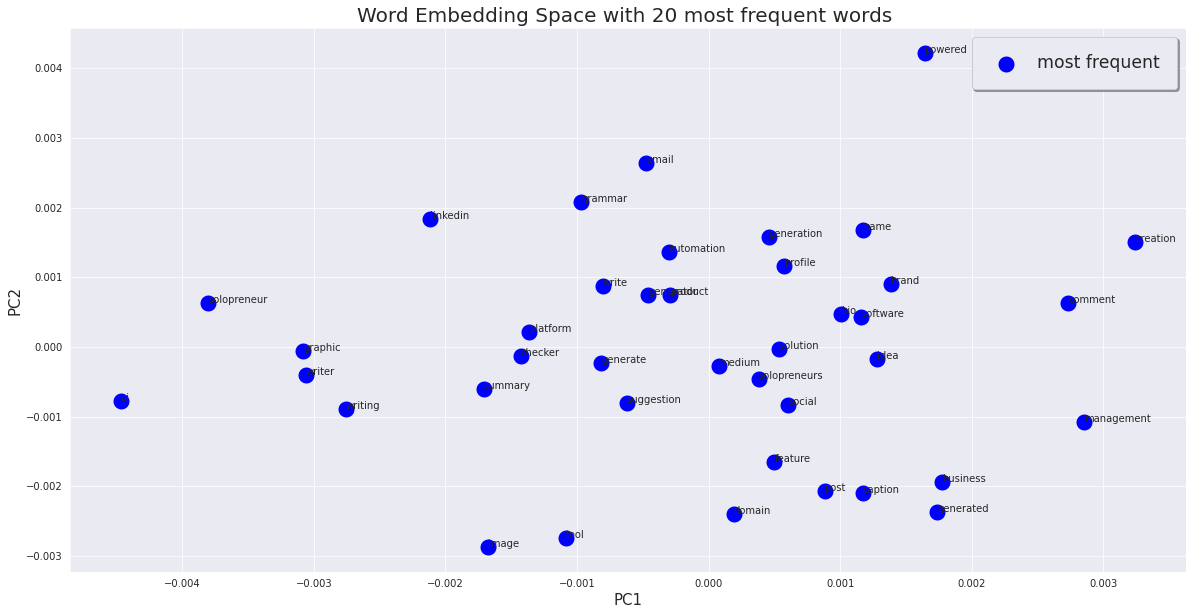

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# plt.scatter(neww_X[20:,0],neww_X[20:,1],linewidths=10,color='red',label='least frequent')
plt.scatter(neww_X[:40,0],neww_X[:40,1],linewidths=10,color='blue',label = 'most frequent')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize='xx-large')
plt.title("Word Embedding Space with 20 most frequent words ",size=20)
vocab=list(model.wv.vocab)[:40]
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))
plt.savefig('most_least_words.png', dpi=400, bbox_inches='tight')
#   plt.annotate(word,xy=(neww_X[i+19,0],neww_X[i+19,1]))

use when we had so much keyword from competitor and then searching, which keyword or which word is always used by most site. this kinda like more to reducing time for compiling keyword